In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn import metrics

In [2]:
df = pd.read_csv('data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df['life_expec'].max()

82.8

In [7]:
scaler = preprocessing.StandardScaler()
country = df['country']
X = df.drop('country', axis=1)
X_scaled = scaler.fit_transform(X)
print(X_scaled[0][0])

1.2915323778422956


<AxesSubplot:>

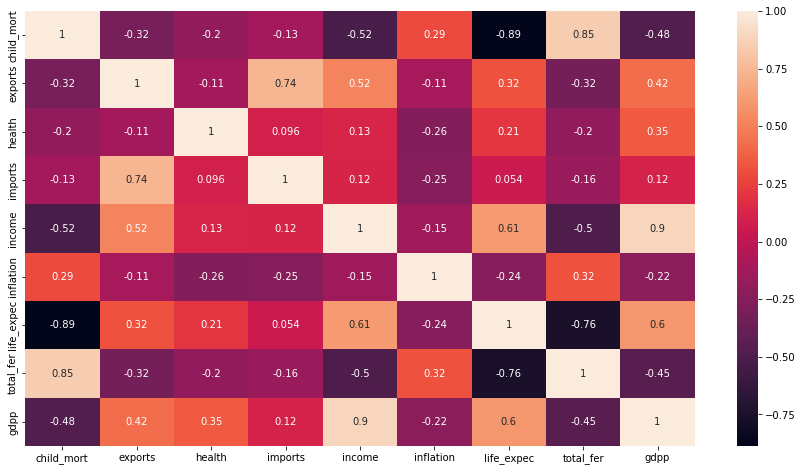

In [14]:
df_sc = pd.DataFrame(X_scaled, columns=X.columns)
plt.figure(figsize=(15, 8))
sns.heatmap(data=df_sc.corr(), annot=True)

In [16]:
pca = decomposition.PCA(n_components=0.9)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(167, 5)

In [17]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

<AxesSubplot:>

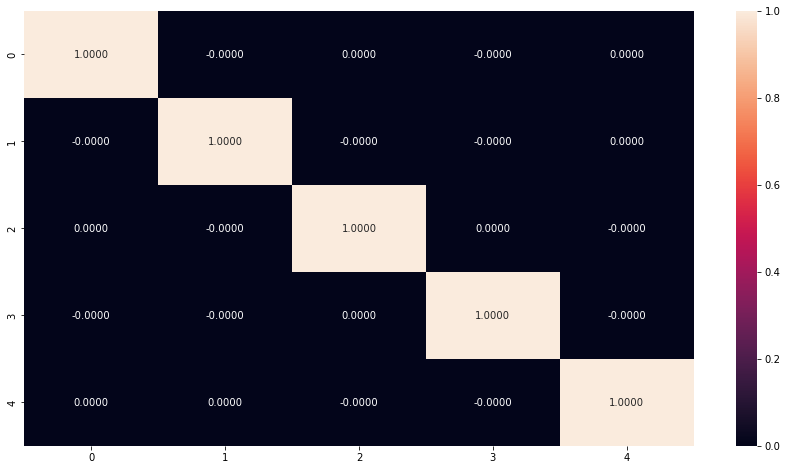

In [20]:
df_pca = pd.DataFrame(X_pca)
plt.figure(figsize=(15, 8))
sns.heatmap(data=df_pca.corr(), annot=True, fmt='.4f')

<AxesSubplot:>

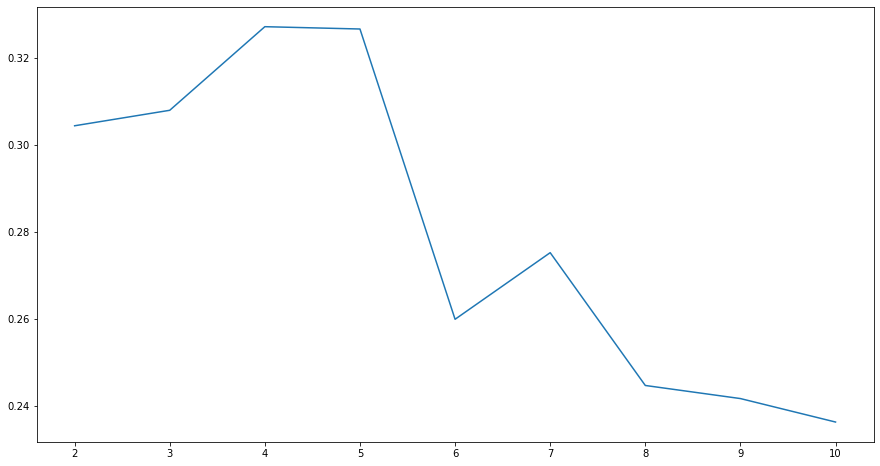

In [24]:
sil_scores = []

for i in range(2, 11):
    model = cluster.KMeans(n_clusters=i)
    model.fit(X_pca)
    sil_scores.append(metrics.silhouette_score(X_pca, model.labels_))
    
plt.figure(figsize=(15, 8))
sns.lineplot(x=[i for i in range(2, 11)], y=sil_scores)

In [27]:
model = cluster.KMeans(n_clusters=4, random_state=1)
model.fit(X_pca)
df['label'] = model.labels_
tmp = df.groupby('label')[['gdpp', 'child_mort']].mean()

In [28]:
tmp

,gdpp,child_mort
label,,
0,6519.552941,21.690588
1,1922.382979,92.961702
2,57566.666667,4.133333
3,42118.750000,5.181250


<AxesSubplot:xlabel='label', ylabel='gdpp'>

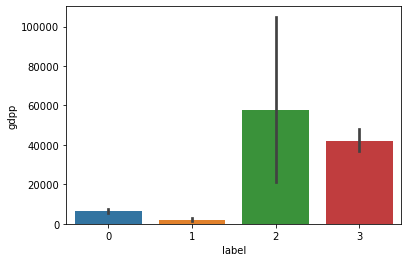

In [31]:
sns.barplot(data=df, x='label', y='gdpp')

<AxesSubplot:xlabel='label', ylabel='child_mort'>

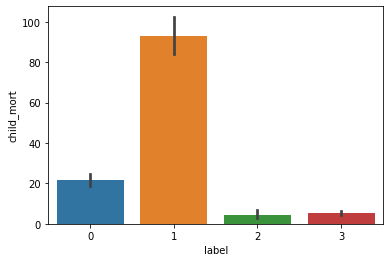

In [32]:
sns.barplot(data=df, x='label', y='child_mort')

In [37]:
df[df.label == 1][['country','life_expec']].sort_values(by='life_expec')

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5
132,Sierra Leone,55.0
64,Guinea-Bissau,55.6
0,Afghanistan,56.2
